LAB 5:

*   Eder José Hernández Buelvas : Last digit: 0
*   Sergio Iván Motta Doncel: Last digit 8



Modify [week_1_quadratic_Po_Shen_Loh.ipyn](https://colab.research.google.com/drive/15vXGB18_np6o0Rw8ZV4o08RTdCdDIdT0?usp=sharing) for

$$ ax^3+bx^+cx +d = 0$$

using Cubic equation – Cardano–Tartaglia formula- [wikipedia](https://en.wikipedia.org/wiki/Cubic_equation)

Asuume $a=1$ then work wequations are of the form

$$ x^3+bx^+cx +d = 0$$

Including expalnataions. plots, solution code and test cases



## Cubic equation  $a x^3 + b x^2 + cx + d = 0$



Are the same root (zeros) of

$$x^3 + \frac{bx^2}{a} x + \frac{cx}{a}+\frac{d}{a} = 0$$

#Formula Cubica General



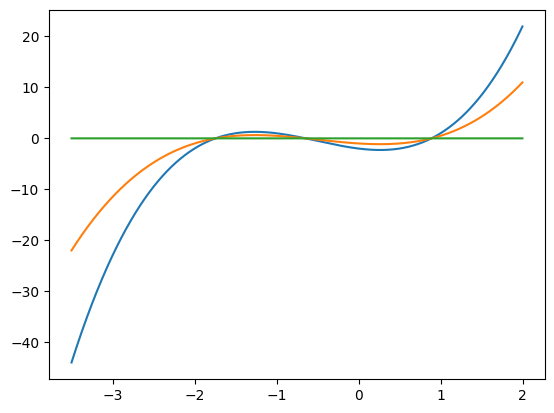

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cubic(a,b,c,d,x):
    return a*x**3+b*x**2+c*x+d

def cubicev(a,b,c,d,x):
    return x**3+(b*x**2/a)+(c*x/a)+(d/a)

# (2x-1) (x+2) = 2x**2 +3x -2 =0;  x_1 = 1/2, x_2 =-2
# Equivalent x**2 +3/2x -1 = 0

x = np.arange(-3.5, 2, 0.001)
z = np.zeros(len(x))
y = cubic(2,3,-2,-2,x)
ynew = cubicev(2,3,-2,-2,x)
plt.plot(x, y, x, ynew, x,z)
plt.show()

Primer paso:


Definir:
$$ Δ_0=b^2 -3ac $$

$$ Δ_1=2b^3 -9bc+27d $$

Segundo paso:

Definir:

$$C=\sqrt[3]{\frac{Δ_1 \pm \sqrt{Δ_1^2-4Δ_0^3}}{2}}$$

Si $$Δ_0=0,  Δ_1=0$$ entonces todas las raices serán de la forma:

$$\frac{-b}{3a}$$



En caso contrario:

$$x_1=-\frac{1}{3a}(b+C+\frac{Δ_0}{C}$$

$$x_2=-\frac{1}{3a}(b+C\frac{-1+\sqrt{-3}}{2}+\frac{Δ_0}{C\frac{-1+\sqrt{-3}}{2}}$$

$$x_3=-\frac{1}{3a}(b+C(\frac{-1+\sqrt{-3}}{2})^2+\frac{Δ_0}{C(\frac{-1+\sqrt{-3}}{2})^2}$$

In [5]:
def cubic(b,c,d,x):
    """Calulate the value of the  qubic equation, v = x**3 + bx**2 + c*x +d

    Parameters
    ----------
    b, c,d  : float
       Coefficients

    Returns
    -------
    v : float """

    # ... enter your code here ...
    v = x**3 + b*x**2 + c*x +d

    return v

In [9]:
import cmath
import math
def solve_cubic(b, c, d):

#With large B, the code isnt work due to proximation problems
    delta = b**2 - 3*c
    delta2 = 2*(b**3) - 9*b*c + 27*d
    C1 = ((delta2 + math.sqrt(delta2**2 - 4*(delta**3))) / 2)**(1/3)
    C2 = ((delta2 - math.sqrt(delta2**2 - 4*(delta**3))) / 2)**(1/3)
    epsilon = (-1 + cmath.sqrt(-3)) / 2

    if delta == 0 and delta2 == 0:
        x = -b / 3
        return x, x, x
    elif C1==0:
       x1 = (-1 / 3) * (b + C2 + (delta / C2))
       x2 = (-1 / 3) * (b + epsilon * C2 + (delta / (epsilon * C2)))
       x3 = (-1 / 3) * (b + C2 * (epsilon**2) + (delta / ((epsilon**2) * C2)))
    else:
       x1 = (-1 / 3) * (b + C1 + (delta / C1))
       x2 = (-1 / 3) * (b + epsilon * C1 + (delta / (epsilon * C1)))
       x3 = (-1 / 3) * (b + C1 * (epsilon**2) + (delta / ((epsilon**2) * C1)))

    return x1, x2, x3

## Por alguna razon este metodo esta añadiendo complejos cuando no debe ser

In [12]:
b = 1000000
c = 3
d = 2

raices = solve_cubic(b, c, d)
print(raices)
print(cubic(b,c,d,raices[0])) #In wolfran, it works. But here, there are problems with cubic formula
print(0==cubic(b,c,d,raices[0]))
print(0==cubic(b,c,d,raices[1]))
print(0==cubic(b,c,d,raices[2]))


(-999999.999997, (-1.4999532140791416e-06-0.0014142122818157077j), (-1.5000308242936928e-06+0.0014142122818157077j))
66.00000900030136
False
False
False


Bulit test cases that include

$$x^3 =1,$$

$$(x-1)^3 = x^3 - 3 x^2 + 3 x - 1,$$

$$(x-1)(x-i)(x+i) = x^3 - x^2 + x - 1, $$

three real diferent roots,  roots in the last digits of the group members, root of mtiuplicity two, and complex roots with small and large $b$.

**Last digits:**

In [10]:
from numpy import allclose
import math

variants = [{'b': 0.0, 'c': 0.0, 'd': 0.0},
            {'b': -3.0, 'c': 3.0,  'd':-1.0},
            {'b': -1.0, 'c': 1.0,  'd':-1.0},
]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))

True
True
True


Three real different roots

In [ ]:
from numpy import allclose
import math

variants = [{'b': -195, 'c': 4223, 'd': -20349},
            {'b': 7, 'c': -50,  'd':-336},
            {'b': -91, 'c': -910,  'd': 100},
]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))

True
True
True


Roots in the last digits of the group members, Last IDs = 0,8. The other member didnt work

In [13]:
from numpy import allclose
import math

variants = [{'b': -8, 'c': 0, 'd': 0}

]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))

True


root of multiplicity two

In [ ]:
from numpy import allclose
import math

variants = [{'b': -7, 'c': 15, 'd': -9}

]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))

True


Complex root with small and large b

In [ ]:
from numpy import allclose
import math

variants = [{'b': -2, 'c': 5, 'd': -6},
            {'b': 910, 'c': 91, 'd': 10}

]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))

True
True


In [11]:
from numpy import allclose
import math

variants = [{'b': -2, 'c': 5, 'd': -6},
]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))

True


 Publisth the notebook in as **pperezp_groupN_CubicEquation.ipynb** at **MetNumUN2023II/Lab5** and submit only the code of **solve_cubic(b, c,d)** in UNcode Quiz Cubic Equation.